In [95]:
import os
import cv2
import numpy as np


# Leer el archivo CSV del dataset FER-2013



In [96]:
def display(img, title=''):
    plt.imshow(img, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

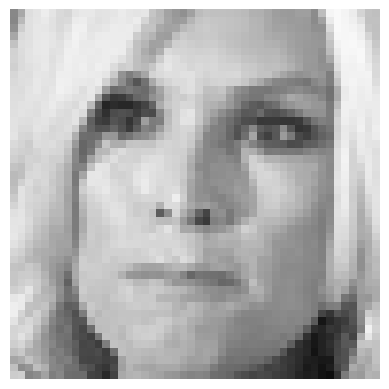

In [97]:
img = cv2.imread(r'train\angry\Training_33331.jpg')
display(img)

In [98]:
img.shape

(48, 48, 3)

In [99]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [100]:
gaussian_blur = cv2.GaussianBlur(img, (3, 3), 0)

median_blur = cv2.medianBlur(img, 5)

average_blur = cv2.blur(img, (5, 5))

laplacian = cv2.Laplacian(img, cv2.CV_64F)
laplacian_img = cv2.convertScaleAbs(laplacian)

canny = cv2.Canny(img, 50, 150)

# Unsharp mask
unsharp_mask = cv2.addWeighted(img, 1.5, gaussian_blur, -0,5, 0)

bilateral_filter = cv2.bilateralFilter(img, 9, 75, 75)

denoised_img = cv2.fastNlMeansDenoising(img, h=15, templateWindowSize=7, searchWindowSize=21)

equalized_hist = cv2.equalizeHist(img)

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
clahe_img = clahe.apply(img)

denoised_hist = cv2.equalizeHist(denoised_img)
hist_denoised = cv2.fastNlMeansDenoising(equalized_hist, h=15, templateWindowSize=7, searchWindowSize=21)
denoised_clahe = clahe.apply(denoised_img)
hist_clahe_denoised = clahe.apply(equalized_hist)
hist_clahe_denoised = cv2.fastNlMeansDenoising(hist_clahe_denoised, h=15, templateWindowSize=7, searchWindowSize=21)

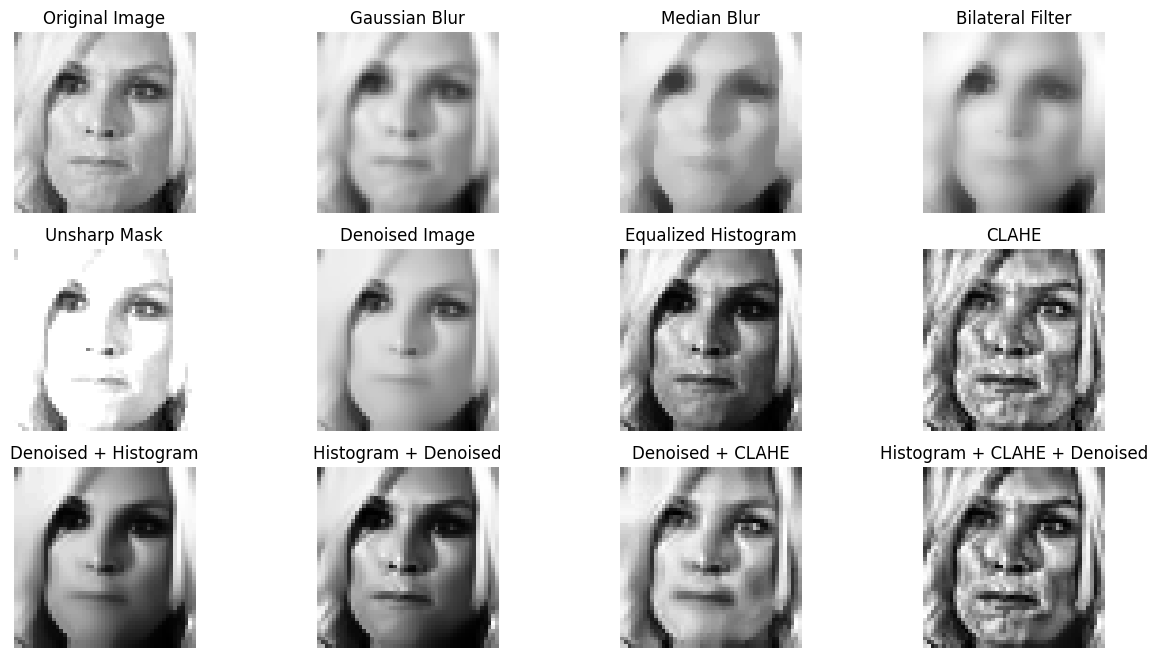

In [101]:
images = [
    img,
    gaussian_blur, 
    median_blur,
    bilateral_filter, 
    unsharp_mask,
    denoised_img, 
    equalized_hist, 
    clahe_img, 
    denoised_hist, 
    hist_denoised,
    denoised_clahe,
    hist_clahe_denoised
    ]
titles = [
    'Original Image',
    'Gaussian Blur', 
    'Median Blur',
    'Bilateral Filter', 
    'Unsharp Mask',
    'Denoised Image', 
    'Equalized Histogram', 
    'CLAHE', 
    'Denoised + Histogram', 
    'Histogram + Denoised',
    'Denoised + CLAHE',
    'Histogram + CLAHE + Denoised'
    ]

plt.figure(figsize=(15, 8))
for i in range(len(images)):
    plt.subplot(3, 4, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.show()

In [102]:
IMG_SIZE = 48

In [103]:
def adjust_brightness(img, value=30):
    """Aumenta o disminuye el brillo."""
    hsv = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
    hsv = cv2.cvtColor(hsv, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)
    v = cv2.add(v, value)
    v = np.clip(v, 0, 255)
    final_hsv = cv2.merge((h, s, v))
    img_bright = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)
    return cv2.cvtColor(img_bright, cv2.COLOR_BGR2GRAY)

In [104]:
def rotate_image(img, angle):
    """Rota la imagen alrededor de su centro."""
    h, w = img.shape[:2]
    M = cv2.getRotationMatrix2D((w/2, h/2), angle, 1)
    return cv2.warpAffine(img, M, (w, h))

In [105]:
def scale_image(img, scale):
    """Escala la imagen (zoom in/out)."""
    h, w = img.shape[:2]
    img_scaled = cv2.resize(img, None, fx=scale, fy=scale, interpolation=cv2.INTER_LINEAR)
    # recorta o rellena para mantener tamaño original
    if scale < 1:
        pad_h = (h - img_scaled.shape[0]) // 2
        pad_w = (w - img_scaled.shape[1]) // 2
        return cv2.copyMakeBorder(img_scaled, pad_h, pad_h, pad_w, pad_w, cv2.BORDER_REFLECT)
    else:
        return img_scaled[0:h, 0:w]

In [106]:
img = cv2.imread(r'train\angry\Training_33331.jpg', cv2.IMREAD_GRAYSCALE)
augmented_images = [
    img,
    adjust_brightness(img, 50),
    adjust_brightness(img, -50),
    rotate_image(img, 15),
    rotate_image(img, -15),
    scale_image(img, 1.2),  # zoom in
    scale_image(img, 0.8)   # zoom out
]

In [107]:
brightness_variants = [
    adjust_brightness(img, -80),
    adjust_brightness(img, -50),
    adjust_brightness(img, -20),
    img,  # original
    adjust_brightness(img, 20),
    adjust_brightness(img, 50),
    adjust_brightness(img, 80)
]



In [108]:
rotation_variants = [
    rotate_image(img, -45),
    rotate_image(img, -30),
    rotate_image(img, -15),
    img,  # original
    rotate_image(img, 15),
    rotate_image(img, 30),
    rotate_image(img, 45)
]

In [109]:
scale_variants = [
    scale_image(img, 0.5),  # zoom out fuerte
    scale_image(img, 0.7),
    scale_image(img, 0.9),
    img,  # original
    scale_image(img, 1.1),
    scale_image(img, 1.3),
    scale_image(img, 1.5)   # zoom in fuerte
]

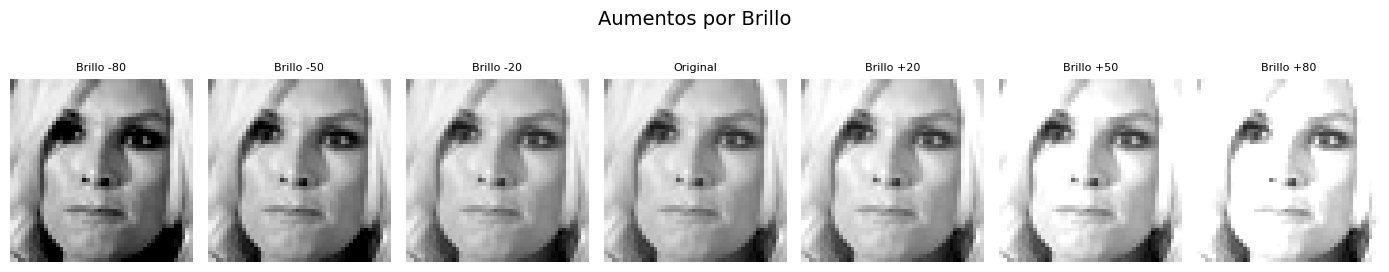

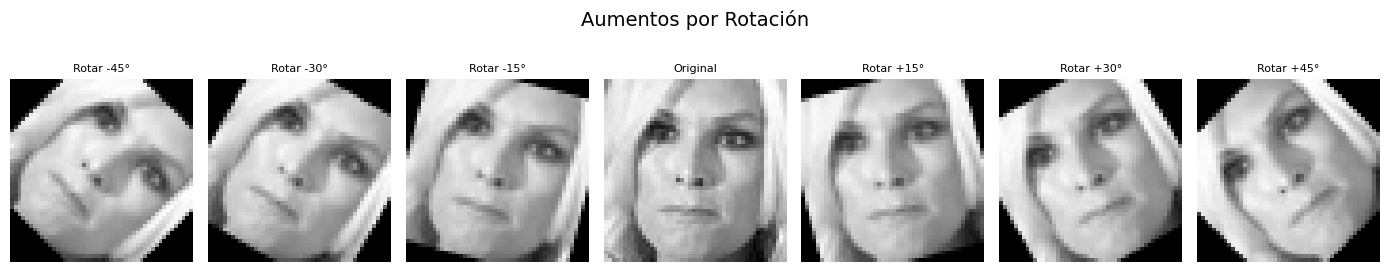

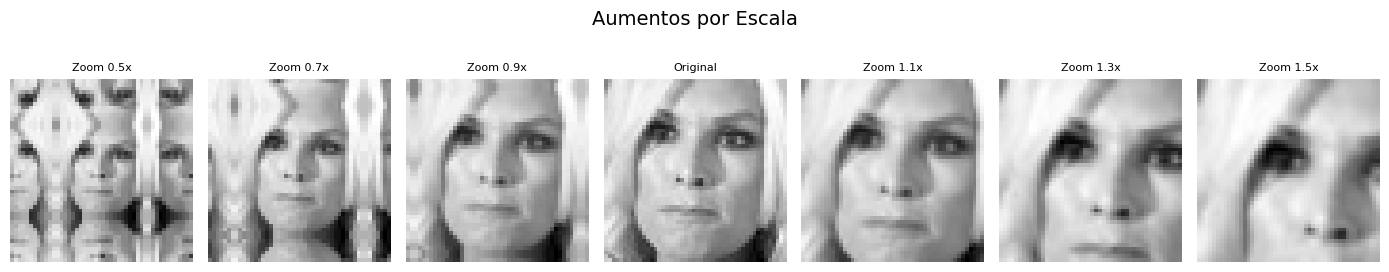

In [110]:
def show_images(images, titles, title_group):
    plt.figure(figsize=(14, 3))
    for i in range(len(images)):
        plt.subplot(1, len(images), i+1)
        plt.imshow(images[i], cmap='gray')
        plt.title(titles[i], fontsize=8)
        plt.axis('off')
    plt.suptitle(title_group, fontsize=14)
    plt.tight_layout()
    plt.show()

# Títulos
brightness_titles = ['Brillo -80', 'Brillo -50', 'Brillo -20', 'Original', 'Brillo +20', 'Brillo +50', 'Brillo +80']
rotation_titles = ['Rotar -45°', 'Rotar -30°', 'Rotar -15°', 'Original', 'Rotar +15°', 'Rotar +30°', 'Rotar +45°']
scale_titles = ['Zoom 0.5x', 'Zoom 0.7x', 'Zoom 0.9x', 'Original', 'Zoom 1.1x', 'Zoom 1.3x', 'Zoom 1.5x']

# Mostrar
show_images(brightness_variants, brightness_titles, "Aumentos por Brillo")
show_images(rotation_variants, rotation_titles, "Aumentos por Rotación")
show_images(scale_variants, scale_titles, "Aumentos por Escala")


In [111]:
def adjust_brightness(image, value):
    return cv2.convertScaleAbs(image, alpha=1, beta=value)

def rotate_image(image, angle):
    h, w = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1)
    return cv2.warpAffine(image, M, (w, h))

def scale_image(image, scale_factor):
    h, w = image.shape[:2]
    return cv2.resize(image, (int(w * scale_factor), int(h * scale_factor)))

In [112]:
def augment_image(image):
    augmented = []

    # Brillo
    for b in [-80, -50, -20, 20, 50, 80]:
        augmented.append(adjust_brightness(image, b))

    # Rotaciones
    for angle in [-45, -30, -15, 15, 30, 45]:
        augmented.append(rotate_image(image, angle))

    # Escalas
    for scale in [0.5, 0.7, 0.9, 1.1, 1.3, 1.5]:
        augmented.append(scale_image(image, scale))

    return augmented

In [113]:
def preprocess_all_images(source_dir, output_dir, img_size=(48, 48)):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    for emotion in os.listdir(source_dir):
        emotion_path = os.path.join(source_dir, emotion)
        if not os.path.isdir(emotion_path):
            continue

        out_emotion_path = os.path.join(output_dir, emotion)
        os.makedirs(out_emotion_path, exist_ok=True)

        for img_name in os.listdir(emotion_path):
            img_path = os.path.join(emotion_path, img_name)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is None:
                continue

            img = cv2.resize(img, img_size)

            # Guardar imagen original
            base_name = os.path.splitext(img_name)[0]
            cv2.imwrite(os.path.join(out_emotion_path, f"{base_name}_orig.jpg"), img)

            # Procesar aumentos
            augmented_imgs = augment_image(img)
            for i, aug in enumerate(augmented_imgs):
                aug_path = os.path.join(out_emotion_path, f"{base_name}_aug_{i}.jpg")
                cv2.imwrite(aug_path, aug)

In [115]:
preprocess_all_images(
    source_dir='UNIDAD4/Tarea_1/train',
    output_dir='UNIDAD4/Tarea_1/augmented',
    img_size=(48, 48)
)
